<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/CaseStudy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset='/content/drive/MyDrive/SUV_Purchase.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

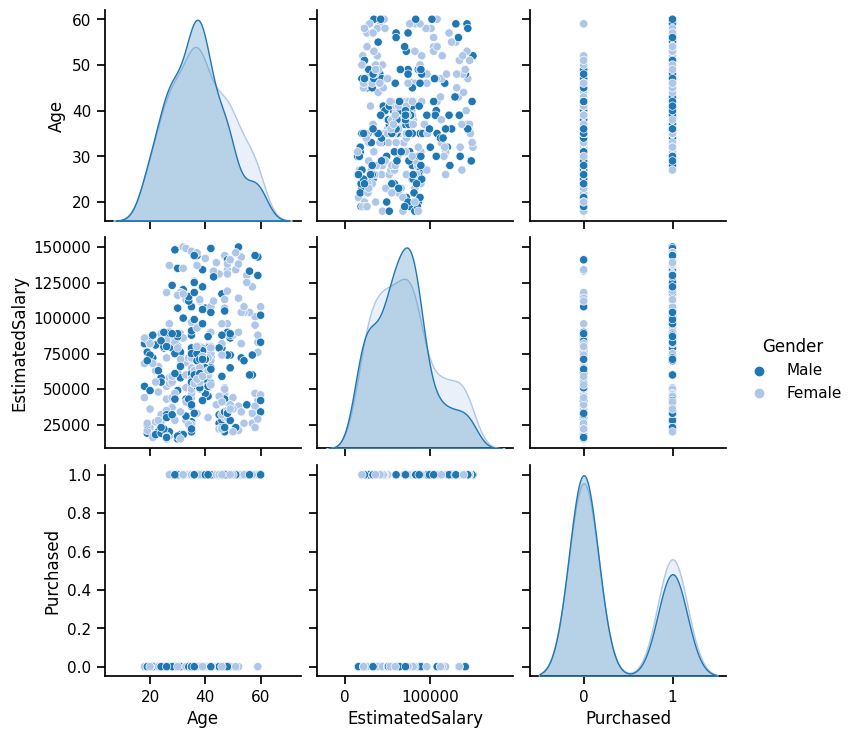

In [ ]:
from seaborn.rcmod import palettes
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Gender', 'Age', 'EstimatedSalary', 'Purchased']],hue='Gender',palette='tab20')

In [7]:
from sklearn.preprocessing import LabelEncoder

gender=df['Gender']
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(gender)

print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


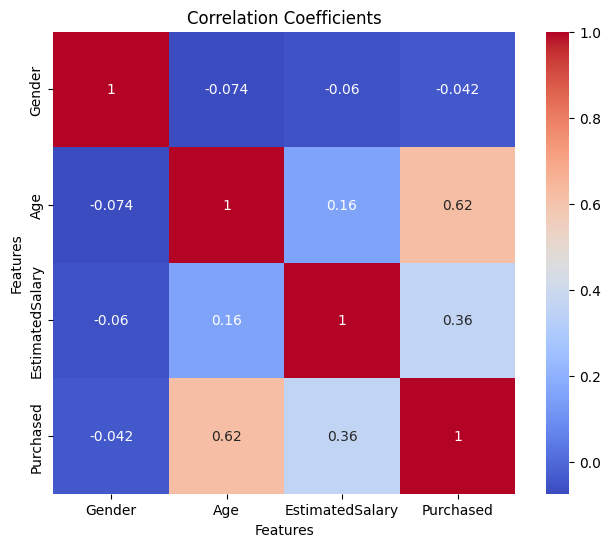

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#df.drop(['User ID'],axis=1)
correlation=df[['Gender','Age','EstimatedSalary','Purchased']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Coefficients')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

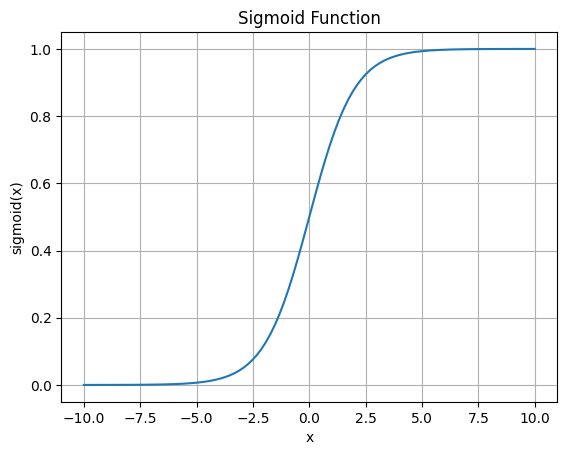

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

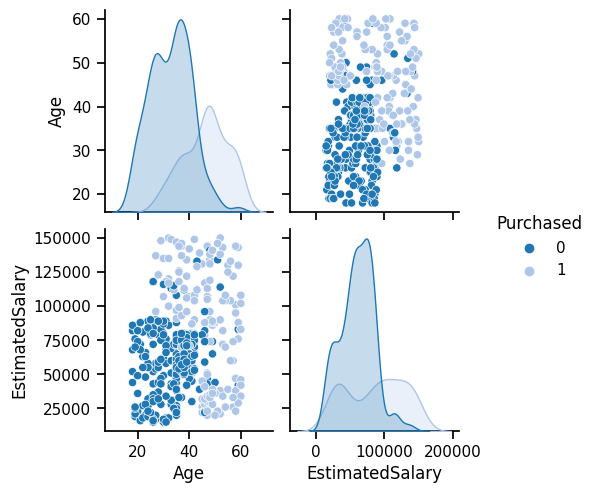

In [ ]:
from seaborn.rcmod import palettes
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Age','EstimatedSalary','Purchased']],hue='Purchased',palette='tab20')

In [8]:
'''X->Independent
Y->Dependent'''

X=df.drop(['User ID','Purchased'],axis=1)
Y=df[['Purchased']]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
x_train

Gender  Age  EstimatedSalary
231       1   39            42000
306       0   51           134000
65        1   24            58000
273       1   39           106000
41        0   33            51000
..      ...  ...              ...
13        1   32            18000
358       1   40            71000
390       1   48            33000
52        0   29            83000
234       0   38           112000

[320 rows x 3 columns]

In [26]:
#Normalizing the data - standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
x_train=sst.fit_transform(x_train)
x_test=sst.transform(x_test)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [39]:
y_pred=knn_clf.predict(x_test)

In [40]:
knn_clf.score(sst.transform(X),Y)

0.9125

Best K value

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

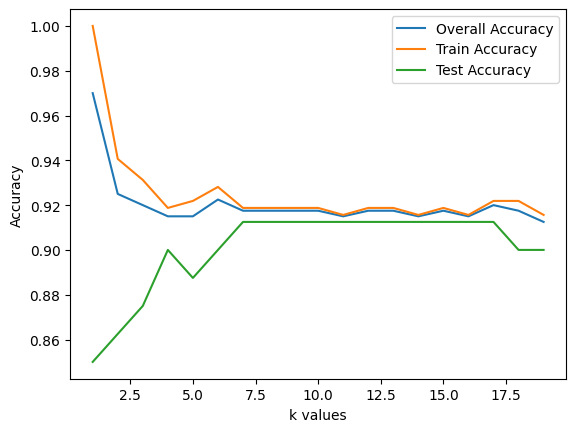

In [38]:
import numpy as np
neighbors=np.arange(1,20)
overall_accuracy=np.empty(len(neighbors))
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))


for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(x_train,y_train)

  #training accuracy
  train_accuracy[i]=knn_clf.score(x_train,y_train)
  test_accuracy[i]=knn_clf.score(x_test,y_test)

  #overall accuracy
  overall_accuracy[i]=knn_clf.score(sst.transform(X),Y)

#plotting
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,train_accuracy,label="Train Accuracy")
plt.plot(neighbors,test_accuracy,label="Test Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





In [31]:
train_accuracy

array([1.      , 0.940625, 0.93125 , 0.91875 , 0.921875, 0.928125,
       0.91875 , 0.91875 , 0.91875 , 0.91875 , 0.915625, 0.91875 ,
       0.91875 , 0.915625, 0.91875 , 0.915625, 0.921875, 0.921875,
       0.915625])

In [32]:
test_accuracy

array([0.85  , 0.8625, 0.875 , 0.9   , 0.8875, 0.9   , 0.9125, 0.9125,
       0.9125, 0.9125, 0.9125, 0.9125, 0.9125, 0.9125, 0.9125, 0.9125,
       0.9125, 0.9   , 0.9   ])

In [ ]:
x_train

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [13]:
model.score(x_test,y_test)

0.8875

In [14]:
model.score(x_train,y_train)*100

83.75

In [15]:
X=sst.transform(X)

In [16]:
model.score(X,Y)*100

84.75

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ')
print(confusion)

Accuracy: 0.8875
Confusion Matrix : 
[[49  4]
 [ 5 22]]


In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm1=confusion_matrix(y_train,model.predict(x_train))

print(cm1)

Confusion matrix for training Data :: 
[[186  18]
 [ 34  82]]


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm2=confusion_matrix(y_test,model.predict(x_test))

print(cm2)

Confusion matrix for training Data :: 
[[49  4]
 [ 5 22]]


In [20]:
print("Confusion matrix for overall Data ")

actual=Y

predicted=model.predict(sst.transform(X))

cm=confusion_matrix(actual,predicted)

print(cm)

Confusion matrix for overall Data 
[[257   0]
 [143   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


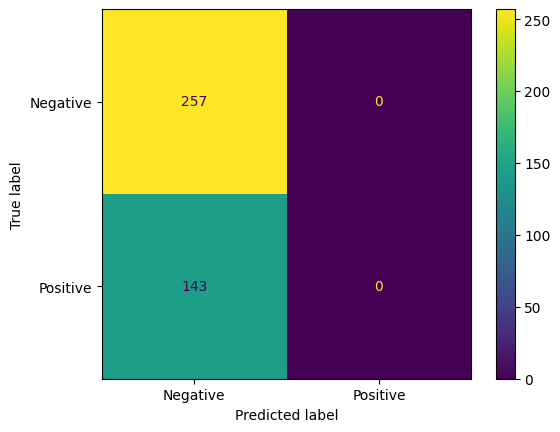

In [21]:
from sklearn import metrics

import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(actual,predicted)

cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative','Positive'])

cm_display.plot()